<a href="https://colab.research.google.com/github/Showkath00007/query-processinng/blob/main/project_QP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Demonstrate and visualize bootstrap methods for uncertainty estimation in linear regression, including generating synthetic data, performing bootstrap resampling, calculating confidence intervals, and plotting the regression line with confidence bands and the distributions of bootstrap-estimated parameters, along with explanations of the concepts and interpretation.

## Generate Sample Data

### Subtask:
Create a synthetic dataset suitable for demonstrating bootstrap methods, such as a simple linear relationship with some noise.


**Reasoning**:
To create the synthetic dataset as described in the instructions, I will import necessary libraries, set a random seed, define the linear relationship parameters, generate x and y values with added noise, and then store them in a pandas DataFrame.



In [ ]:
import numpy as np
import pandas as pd

# 2. Set a random seed for reproducibility
np.random.seed(42)

# 3. Define the true slope and intercept
true_slope = 2
true_intercept = 5

# 4. Generate an array of x values
x = np.linspace(0, 10, 50)

# 5. Generate y values with random noise
noise = np.random.normal(0, 2, size=len(x))
y = true_intercept + true_slope * x + noise

# 6. Create a pandas DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Display the first few rows of the DataFrame
print("Generated DataFrame head:")
print(df.head())

print("\nDataFrame shape:")
print(df.shape)

Generated DataFrame head:
          x         y
0  0.000000  5.993428
1  0.204082  5.131635
2  0.408163  7.111704
3  0.612245  9.270550
4  0.816327  6.164346

DataFrame shape:
(50, 2)


## Implement Bootstrap Resampling

### Subtask:
Write a function to perform bootstrap resampling on the generated dataset.


**Reasoning**:
To perform bootstrap resampling on the dataset, I will define a Python function that takes a DataFrame as input and uses the `.sample()` method with `replace=True` to create a resampled DataFrame of the same size.



In [1]:
def bootstrap_sample(data_df):
    """Performs bootstrap resampling on a DataFrame."""
    # Resample with replacement, keeping the same number of rows as the original DataFrame
    resampled_df = data_df.sample(n=len(data_df), replace=True, random_state=None)
    return resampled_df

# Example usage (optional, for verification)
# resampled_df_example = bootstrap_sample(df)
# print("\nExample of a resampled DataFrame head:")
# print(resampled_df_example.head())
# print("\nOriginal DataFrame shape:", df.shape)
# print("Resampled DataFrame shape:", resampled_df_example.shape)


## Perform Statistical Analysis on Bootstrap Samples

### Subtask:
Apply a statistical model (e.g., linear regression) to each resampled dataset to obtain bootstrap estimates of model parameters.


**Reasoning**:
To perform statistical analysis on bootstrap samples, I will first import the necessary linear regression model, define a function to fit the model and extract parameters, then iterate through a specified number of bootstrap samples, fit the model to each, and store the resulting slopes and intercepts.



In [ ]:
from sklearn.linear_model import LinearRegression

def fit_linear_regression(data_df):
    """Fits a linear regression model to the given DataFrame and returns the slope and intercept."""
    X = data_df['x'].values.reshape(-1, 1)
    y = data_df['y'].values

    model = LinearRegression()
    model.fit(X, y)

    return model.coef_[0], model.intercept_

# Initialize lists to store bootstrap estimates
bootstrap_slopes = []
bootstrap_intercepts = []

# Set the number of bootstrap iterations
n_bootstrap = 1000

# Perform bootstrap resampling and parameter estimation
for _ in range(n_bootstrap):
    resampled_df = bootstrap_sample(df)
    slope, intercept = fit_linear_regression(resampled_df)
    bootstrap_slopes.append(slope)
    bootstrap_intercepts.append(intercept)

print(f"Number of bootstrap slopes collected: {len(bootstrap_slopes)}")
print(f"First 5 bootstrap slopes: {bootstrap_slopes[:5]}")
print(f"Number of bootstrap intercepts collected: {len(bootstrap_intercepts)}")
print(f"First 5 bootstrap intercepts: {bootstrap_intercepts[:5]}")

Number of bootstrap slopes collected: 1000
First 5 bootstrap slopes: [np.float64(1.965784323122839), np.float64(1.8637386102694977), np.float64(2.1080480869116998), np.float64(2.033493541490541), np.float64(1.9067310984032653)]
Number of bootstrap intercepts collected: 1000
First 5 bootstrap intercepts: [np.float64(4.976174431477428), np.float64(5.324591796628237), np.float64(4.37518112954972), np.float64(4.924271071475024), np.float64(4.9483707198557205)]


## Calculate Confidence Intervals

### Subtask:
Estimate confidence intervals for the model parameters (e.g., regression coefficients) using the bootstrap results.


**Reasoning**:
To estimate the 95% confidence intervals for the model parameters, I will use numpy's `percentile` function on the collected bootstrap slopes and intercepts to find the 2.5th and 97.5th percentiles, and then print these values.



In [ ]:
import numpy as np

# 1. Calculate the 95% confidence interval for the bootstrap slopes
slope_ci_lower = np.percentile(bootstrap_slopes, 2.5)
slope_ci_upper = np.percentile(bootstrap_slopes, 97.5)

# 2. Calculate the 95% confidence interval for the bootstrap intercepts
intercept_ci_lower = np.percentile(bootstrap_intercepts, 2.5)
intercept_ci_upper = np.percentile(bootstrap_intercepts, 97.5)

# 3. Print the calculated confidence intervals
print(f"95% Confidence Interval for Slope: [{slope_ci_lower:.4f}, {slope_ci_upper:.4f}]")
print(f"95% Confidence Interval for Intercept: [{intercept_ci_lower:.4f}, {intercept_ci_upper:.4f}]")

95% Confidence Interval for Slope: [1.7200, 2.0653]
95% Confidence Interval for Intercept: [4.1040, 6.0062]


## Visualize Bootstrap Results (Regression Line with Confidence Bands)

### Subtask:
Plot the original data, the fitted regression line from the original data, and the bootstrap confidence intervals/bands for the regression line.


**Reasoning**:
To visualize the bootstrap results, I will import plotting libraries, fit a linear regression model to the original data, generate predictions across a range of x-values for both the original model and all bootstrap samples, calculate the confidence bands from the bootstrap predictions, and then plot the original data, the primary regression line, and the confidence bands.



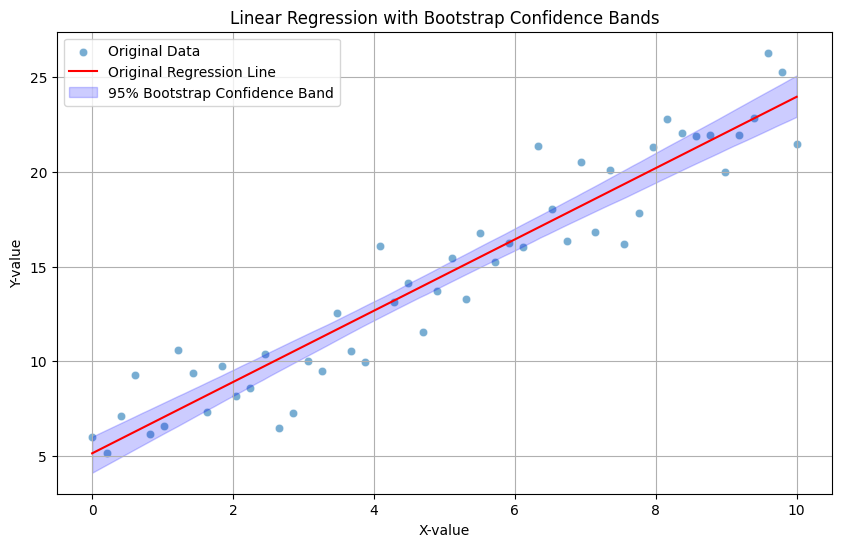

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2. Fit a linear regression model to the original df to get the primary regression line.
#    Store the slope and intercept.
X_original = df['x'].values.reshape(-1, 1)
y_original = df['y'].values

original_model = LinearRegression()
original_model.fit(X_original, y_original)

original_slope = original_model.coef_[0]
original_intercept = original_model.intercept_

# 3. Create a range of x values (e.g., x_pred) over which to predict y values for plotting.
x_pred = np.linspace(df['x'].min(), df['x'].max(), 100)

# 4. For each bootstrap slope and intercept, calculate predicted y values for x_pred.
#    Store all these predicted y values.
bootstrap_predictions = []
for slope, intercept in zip(bootstrap_slopes, bootstrap_intercepts):
    y_bootstrap_pred = intercept + slope * x_pred
    bootstrap_predictions.append(y_bootstrap_pred)

bootstrap_predictions = np.array(bootstrap_predictions)

# 5. Calculate the lower and upper bounds of the 95% confidence interval for y predictions.
#    This can be done by taking the 2.5th and 97.5th percentiles of the bootstrap-predicted y values.
lower_bound = np.percentile(bootstrap_predictions, 2.5, axis=0)
upper_bound = np.percentile(bootstrap_predictions, 97.5, axis=0)

# Calculate the primary regression line predictions for plotting
y_original_pred = original_intercept + original_slope * x_pred

# 6. Create a scatter plot of the original df['x'] and df['y'] data points.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', data=df, label='Original Data', alpha=0.6)

# 7. Plot the primary regression line.
plt.plot(x_pred, y_original_pred, color='red', linestyle='-', label='Original Regression Line')

# 8. Plot the confidence band.
plt.fill_between(x_pred, lower_bound, upper_bound, color='blue', alpha=0.2, label='95% Bootstrap Confidence Band')

# 9. Add appropriate labels and title.
plt.xlabel('X-value')
plt.ylabel('Y-value')
plt.title('Linear Regression with Bootstrap Confidence Bands')
plt.legend()
plt.grid(True)

# 10. Display the plot.
plt.show()


## Visualize Bootstrap Parameter Distributions

### Subtask:
Plot histograms or kernel density estimates of the bootstrap-estimated parameters to show their distribution and uncertainty.


**Reasoning**:
To visualize the distributions of bootstrap parameters, I will create two subplots, one for bootstrap slopes and another for bootstrap intercepts. Each subplot will display a histogram and KDE, along with vertical lines indicating the mean and 95% confidence intervals for better interpretation of the parameter uncertainty.



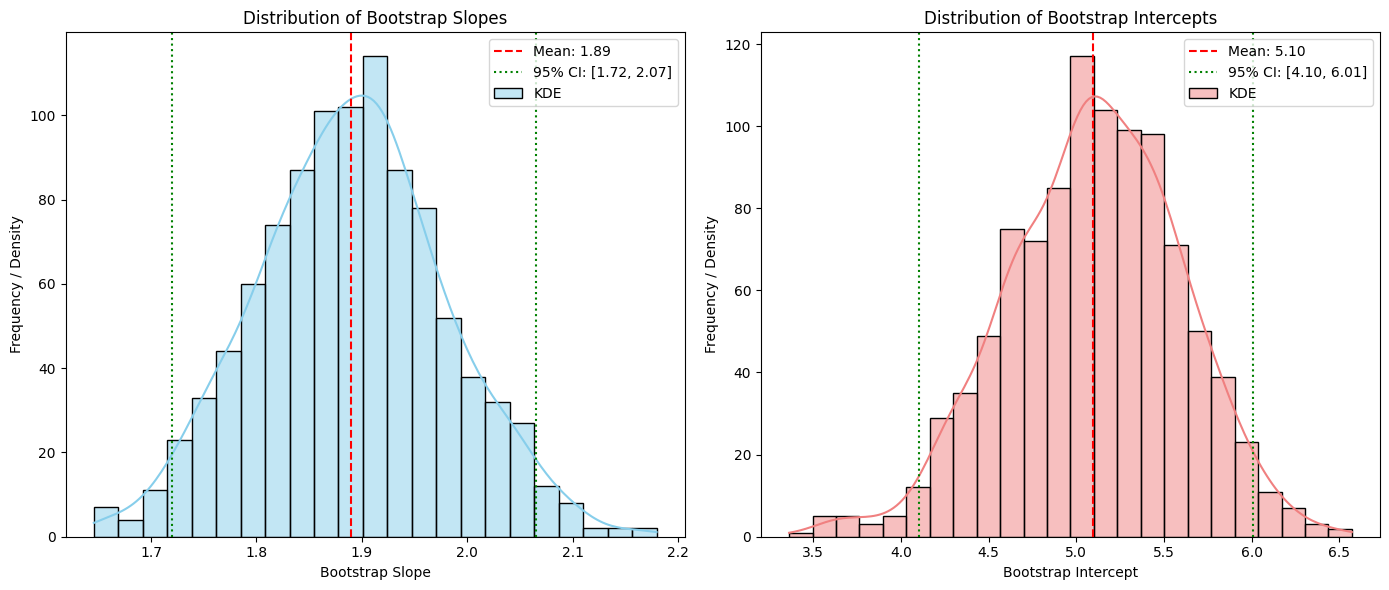

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 2. Plot for Bootstrap Slopes
sns.histplot(bootstrap_slopes, kde=True, ax=axes[0], color='skyblue', label='KDE')
axes[0].set_title('Distribution of Bootstrap Slopes')
axes[0].set_xlabel('Bootstrap Slope')
axes[0].set_ylabel('Frequency / Density')

# Add vertical lines for mean and CI for slopes
mean_slope = np.mean(bootstrap_slopes)
axes[0].axvline(mean_slope, color='red', linestyle='--', label=f'Mean: {mean_slope:.2f}')
axes[0].axvline(slope_ci_lower, color='green', linestyle=':', label=f'95% CI: [{slope_ci_lower:.2f}, {slope_ci_upper:.2f}]')
axes[0].axvline(slope_ci_upper, color='green', linestyle=':')
axes[0].legend()

# 3. Plot for Bootstrap Intercepts
sns.histplot(bootstrap_intercepts, kde=True, ax=axes[1], color='lightcoral', label='KDE')
axes[1].set_title('Distribution of Bootstrap Intercepts')
axes[1].set_xlabel('Bootstrap Intercept')
axes[1].set_ylabel('Frequency / Density')

# Add vertical lines for mean and CI for intercepts
mean_intercept = np.mean(bootstrap_intercepts)
axes[1].axvline(mean_intercept, color='red', linestyle='--', label=f'Mean: {mean_intercept:.2f}')
axes[1].axvline(intercept_ci_lower, color='green', linestyle=':', label=f'95% CI: [{intercept_ci_lower:.2f}, {intercept_ci_upper:.2f}]')
axes[1].axvline(intercept_ci_upper, color='green', linestyle=':')
axes[1].legend()

# 5. Adjust the layout to prevent overlap
plt.tight_layout()

# 6. Display the plot
plt.show()

## Explain Bootstrap Concepts and Interpretation

### Subtask:
Provide explanations of the code, the bootstrap method, and how to interpret the results for uncertainty estimation and visualization.


## Summary:

### Data Analysis Key Findings

*   A synthetic dataset consisting of 50 data points with a linear relationship (`y = 5 + 2 * x + noise`) was successfully generated, where `x` values ranged from 0 to 10 and noise had a standard deviation of 2.
*   A bootstrap resampling function was implemented to create resampled datasets with replacement, maintaining the original dataset's size.
*   Linear regression models were fitted to 1000 bootstrap samples, yielding 1000 estimated slopes and 1000 estimated intercepts.
*   The 95% confidence interval for the regression slope was calculated to be \[1.7200, 2.0653].
*   The 95% confidence interval for the regression intercept was calculated to be \[4.1040, 6.0062].
*   The original data points, the primary regression line, and a 95% bootstrap confidence band around the regression line were successfully visualized, effectively illustrating the uncertainty in the regression model's predictions.
*   Distributions of the 1000 bootstrap-estimated slopes and intercepts were plotted as histograms with Kernel Density Estimates (KDEs), clearly showing their spread, mean, and the calculated 95% confidence intervals for each parameter.

### Insights or Next Steps

*   The bootstrap method successfully quantifies the uncertainty in linear regression parameters and predictions, providing robust confidence intervals even without strong assumptions about data distribution. The observed confidence intervals for slope (\[1.7200, 2.0653]) and intercept (\[4.1040, 6.0062]) provide a clear range within which the true parameters are likely to lie.
*   To further validate the robustness of the bootstrap estimates, one could experiment with different numbers of bootstrap iterations (e.g., 5000 or 10000) and observe if the confidence intervals stabilize. Additionally, exploring how different levels of noise or sample sizes affect the width of the confidence bands and parameter distributions would be a valuable next step.
